**Segmentação de imagens**

Usada quando são necessárias mais informações dos objetos

A segmentação retira todo o objeto, segmentando-o do fundo. Pois, na detecção obtém-se informação sobre o fundo da imagem.

Segmentação por instância: Os objetos são tratados de forma diferente, mesmo que sejam objetos da mesma classe.

Segmentação semântica: Os objetos da mesma classe são tratados da mesma forma.

Mask R-CNN: Usada para a segmentação de imagens. Baseada em RCNN, FAST RCNN, FASTER RCNN. Ela permite a detecção de objetos + segmentação.

2013 - RCNN: Imagem -> Extração de regiões da imagem -> computação das caracteritiscas -> classificação. Utiliza aprendizagem por transferência.

2015 - FAST RCNN: Melhorias em relação a RCNN -> Camadas de pooling + softmax + retorno das caixas delimitadoras + localização dos objetos. Treinada do zero.

2015 - FASTER RCNN: camadas de convolução + máscaras para remover o fundo + detecção e extração do objeto.

In [ ]:
# Download do repositório
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
%cd Mask_RCNN/

/content/Mask_RCNN/Mask_RCNN


In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [ ]:
%cd ..

/content/Mask_RCNN


In [ ]:
import os 
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 1.x # Necessário pois a Mask-RCNN foi desenvolvida com a versão 1.x do tensorflow
import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # Necessário pois a Mask-RCNN foi desenvolvida com a versão 1.x do tensorflow`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
ROOT_DIR = os.path.abspath('./Mask_RCNN')

In [ ]:
sys.path.append(ROOT_DIR) # Adicionado o diretório da Mask RCNN no diretório do colab

In [ ]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib  # Modelo da rede, definição da estrutura da rede convolucional

In [ ]:
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/')) # Coco dataset

In [ ]:
import coco

In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

**Carregamento da rede**

In [ ]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [ ]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [ ]:
config = InferenceConfig()

In [ ]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
rede = modellib.MaskRCNN(mode='inference' # A rede será criada em modo de previsão
                         , model_dir = MODEL_DIR # Diretório dos logs da execução
                         , config= config
                          )

In [ ]:
!pip install h5py==2.10.0 # Necessário para carregar os pesos da rede

In [ ]:
rede.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
class_names = ['BG',
'person',
'bicycle',
'car',
'motorcycle',
'airplane',
'bus',
'train',
'truck',
'boat',
'traffic light',
'fire hydrant',
'stop sign',
'parking meter',
'bench',
'bird',
'cat',
'dog',
'horse',
'sheep',
'cow',
'elephant',
'bear',
'zebra',
'giraffe',
'backpack',
'umbrella',
'handbag',
'tie',
'suitcase',
'frisbee',
'skis',
'snowboard',
'sports ball',
'kite',
'baseball bat',
'baseball glove',
'skateboard',
'surfboard',
'tennis racket',
'bottle',
'wine glass',
'cup',
'fork',
'knife',
'spoon',
'bowl',
'banana',
'apple',
'sandwich',
'orange',
'broccoli',
'carrot',
'hot dog',
'pizza',
'donut',
'cake',
'chair',
'couch',
'potted plant',
'bed',
'dining table',
'toilet',
'tv',
'laptop',
'mouse',
'remote',
'keyboard',
'cell phone',
'microwave',
'oven',
'toaster',
'sink',
'refrigerator',
'book',
'clock',
'vase',
'scissors',
'teddy bear',
'hair drier',
'toothbrush']

In [ ]:
len(class_names)

81

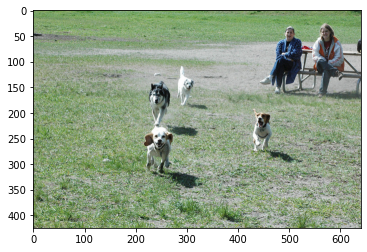

In [ ]:
imagem = skimage.io.imread('/content/Mask_RCNN/images/2516944023_d00345997d_z.jpg')
plt.imshow(imagem)

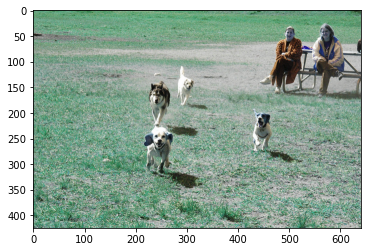

In [ ]:
imagem = cv2.imread('/content/Mask_RCNN/images/2516944023_d00345997d_z.jpg')
plt.imshow(imagem)

**Diferença opencv e skimage**

OpenCV trabalha com os canais de cor invertidos

skimage está com o formato dos canais de cor em RGB

In [ ]:
resultados = rede.detect([imagem], verbose = 0 # Evitar mostrar mensagens do processamento
                         )
resultados # class_ids = id da classe
           # masks -> vetor, true = objeto, false = fundo
           # Rois -> caixa delimitadora

[{'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
   

In [ ]:
class_names[1]

('person', 'umbrella')

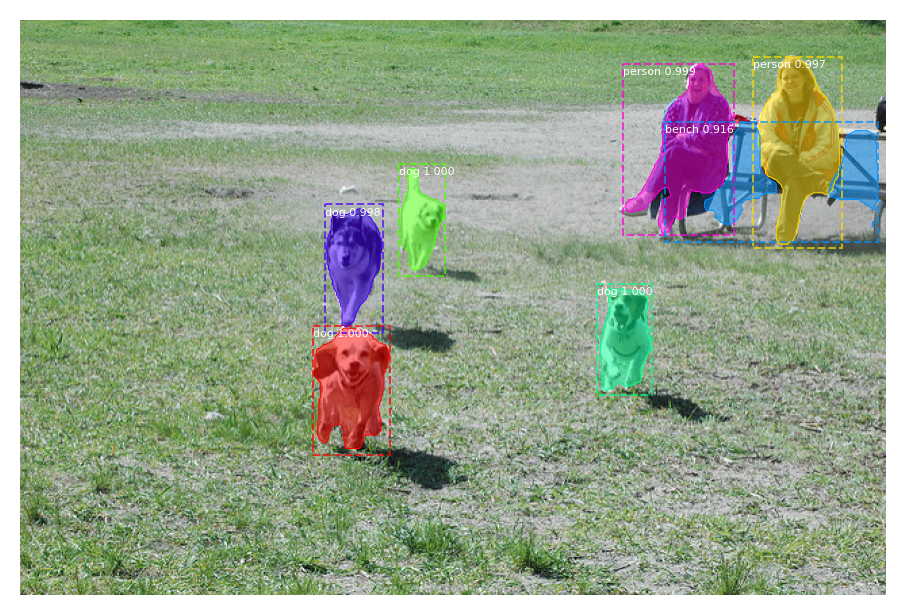

In [ ]:
r = resultados[0]
visualize.display_instances(imagem, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

**Remoção do fundo**

In [ ]:
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([1881596,   22404]))

In [ ]:
def segmentar(imagem, r, indice):
  mask = r['masks'][:,:,indice]
  mask = np.stack((mask,)*3, axis=-1) # Adiciona uma nova dimensão ao final da estrutura
  mask = mask.astype('uint8') 

  # Fundo
  bg = 255 - mask * 255

  mask_show = np.invert(bg) # Inverte os valores

  mask_img = imagem * mask
  result = mask_img + bg
  return result, mask_show

In [ ]:
segmentacao, mask_obj = segmentar(imagem, r, 0)

In [ ]:
def mostrar_segmentacao(imagem, r, indice, show_mask = False):
  segmentacao, mask_obj = segmentar(imagem, r, indice)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')

  if show_mask:
    plt.imshow(np.concatenate([mask_obj, segmentacao], axis = 1))
  else:
    plt.imshow(np.concatenate([imagem, segmentacao], axis = 1))

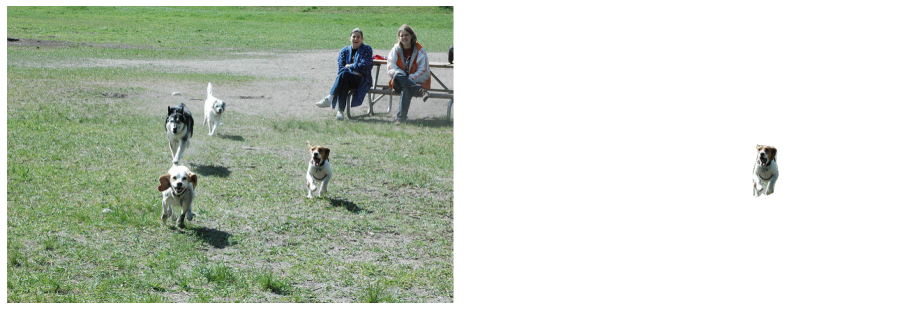

In [ ]:
mostrar_segmentacao(imagem, r, 0, False)

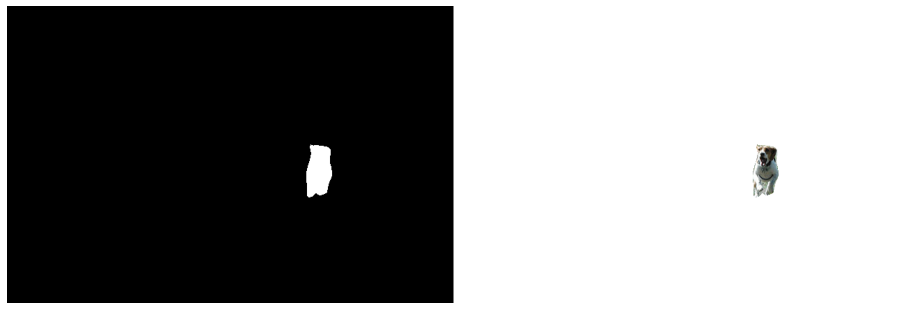

In [ ]:
mostrar_segmentacao(imagem, r, 0, True)

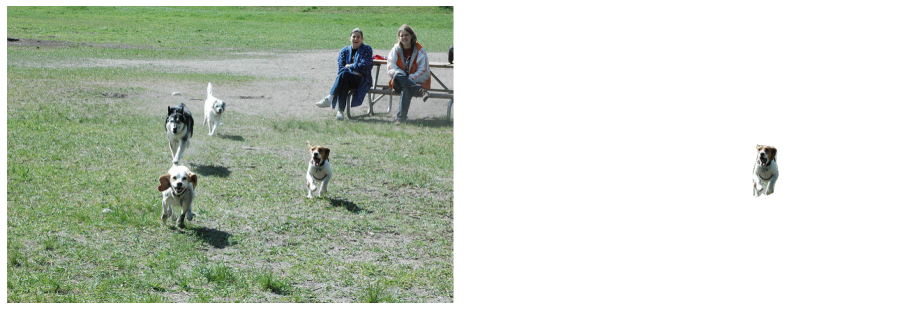

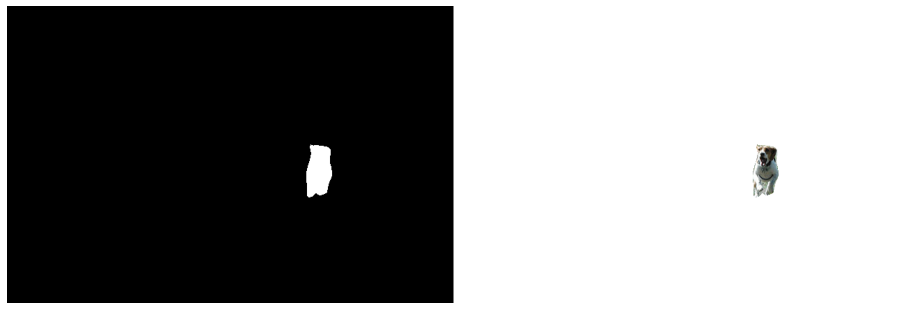

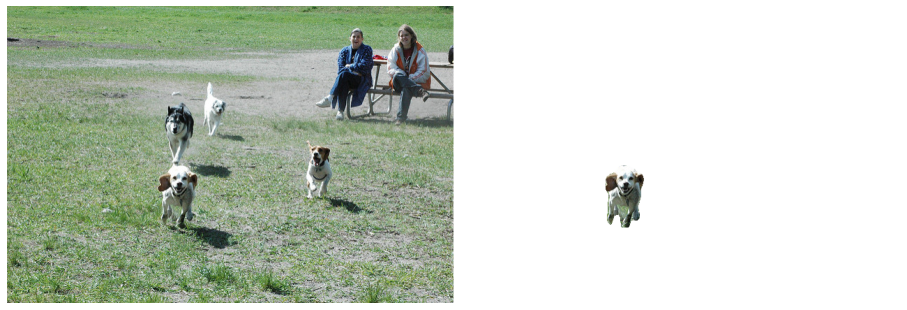

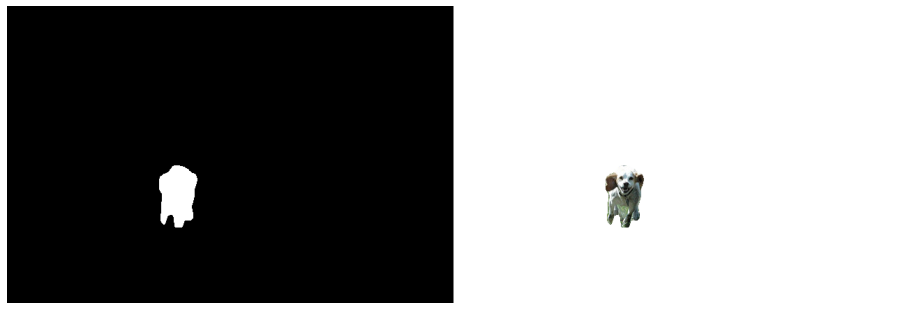

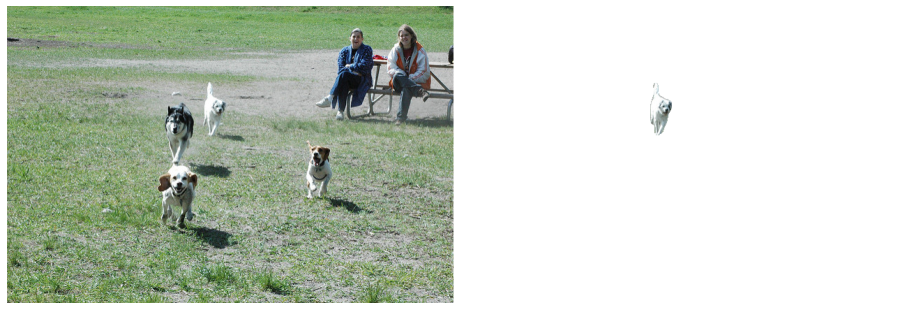

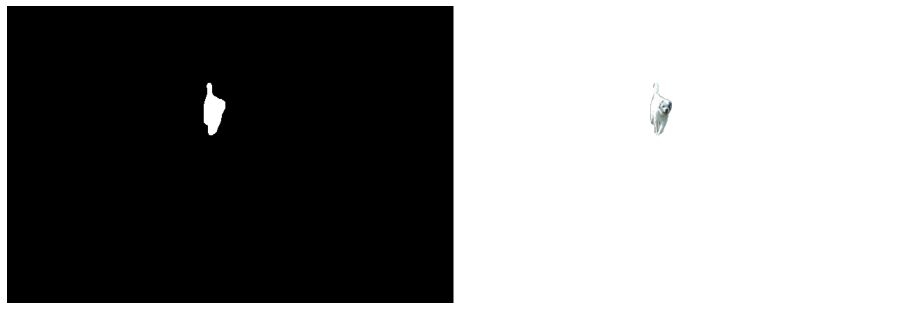

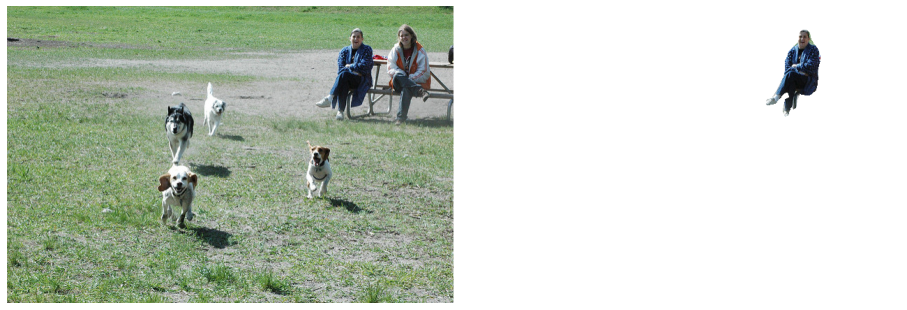

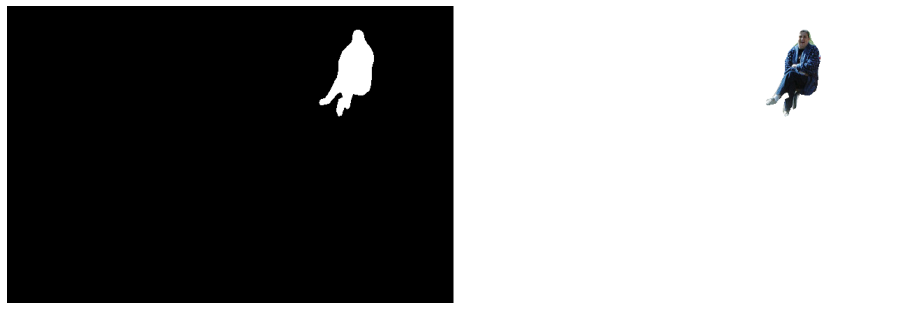

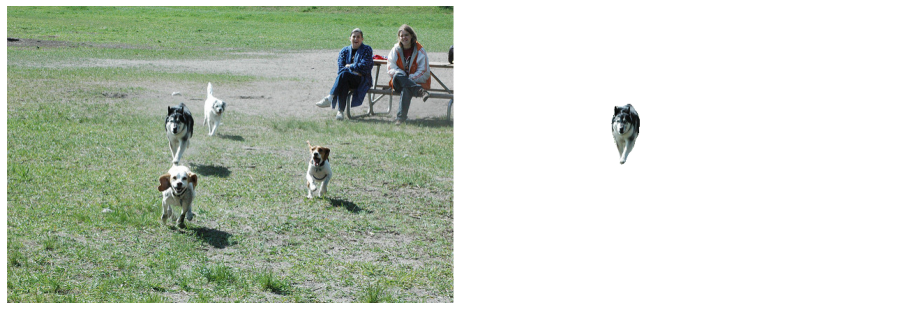

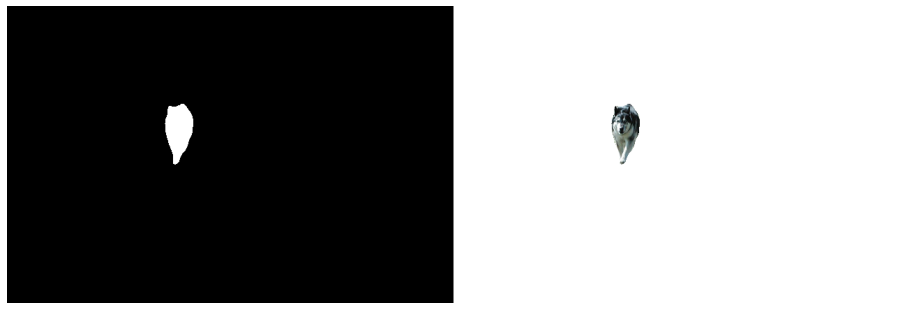

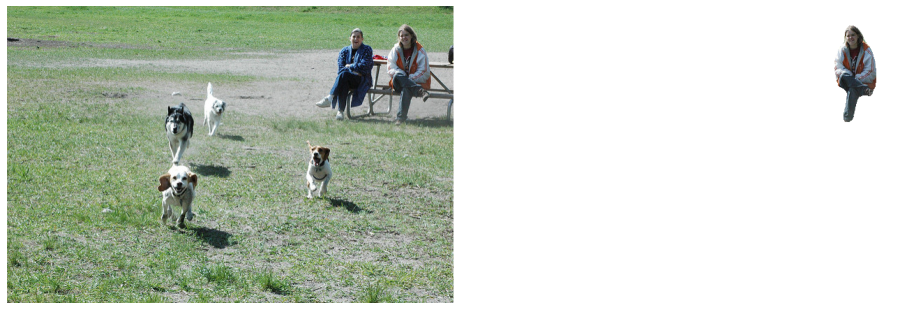

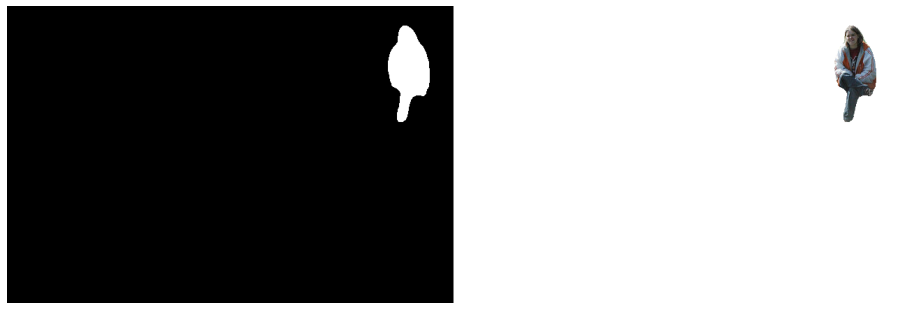

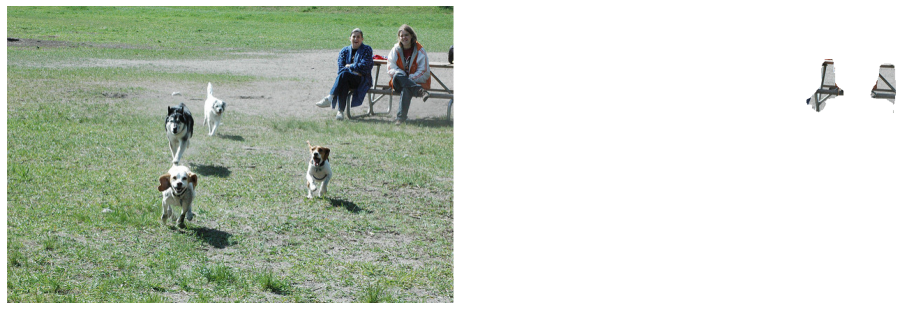

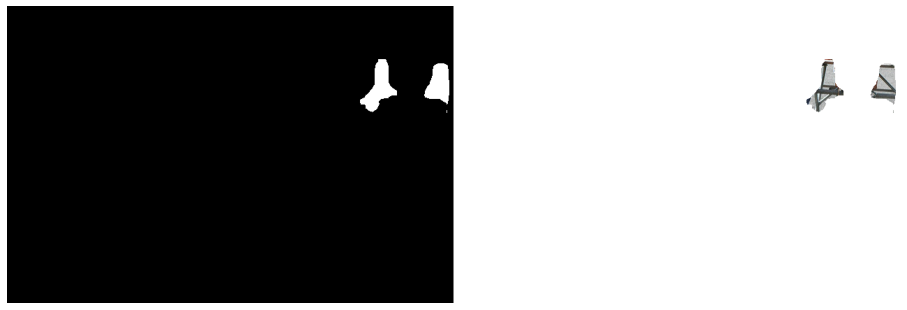

In [ ]:
for indice in range(len(r['rois'])):
  mostrar_segmentacao(imagem, r, indice, False)
  mostrar_segmentacao(imagem, r, indice, True)

In [ ]:
# Uma GAN pode completar uma imagem